## Package Installation and Version Checking

In [1]:
# Print the current Python version being used in this environment (qBraid)
import sys
print(sys.version)

3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:14) [MSC v.1929 64 bit (AMD64)]


In [1]:
!pip install "qiskit[visualization]"   # Install Qiskit with visualization support
!pip qiskit-ibm-runtime                # Install the IBM Quantum Runtime provider for Qiskit to enable access to IBM Quantum backends
!pip install qiskit-aer                # Install Qiskit Aer for high-performance quantum circuit simulation


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
ERROR: unknown command "qiskit-ibm-runtime"
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.5 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Import Qiskit and print the installed Qiskit version

import qiskit
print(qiskit.__version__)

2.0.1


In [3]:
# Import qiskit-ibm-runtime and print the installed version of the package

import qiskit_ibm_runtime
print(qiskit_ibm_runtime.__version__)

0.39.0


In [4]:
# Import Qiskit Aer and print its version
import qiskit_aer
print(qiskit_aer.__version__)

0.17.0


## Import all required Qiskit modules and related libraries

In [26]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Statevector, Operator

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler 

from qiskit_aer import AerSimulator

import matplotlib.pyplot as plt

from math import pi

from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

#### Summary of Quantum Operations
Single-qubit quantum gates &  Multi-qubit quantum gates 

https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb   

https://docs.quantum.ibm.com/api/qiskit/circuit_library#standard-gates

### Run a simple circuit locally using Qiskit Aer package with measurment method


Original Circuit:


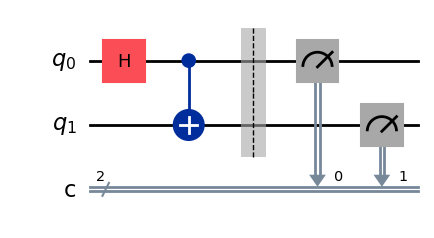

Transpiled Circuit:


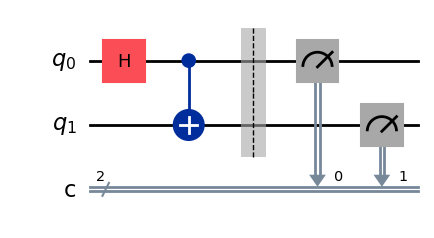

In [ ]:
# Create a single qubit circuit
qc = QuantumCircuit(2, 2)
qc.h(0)  # Hadamard to create superposition
qc.cx(0,1) # CNOT gate
qc.barrier() # Add a barrier for clarity
qc.measure([0,1], [0,1]) # Measure both qubits

# Transpile the circuit
transpiled_qc = transpile(qc) # Transpile the circuit to a target backend

# Draw the original and transpiled circuits
print("Original Circuit:") 
display(qc.draw('mpl')) 

print("Transpiled Circuit:") 
display(transpiled_qc.draw('mpl')) # Display the transpiled circuit

In [9]:
# Initialize the default QASM simulator from the Qiskit Aer package
backend = AerSimulator() 
job = backend.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()

In [10]:
print(counts)

{'11': 491, '00': 509}


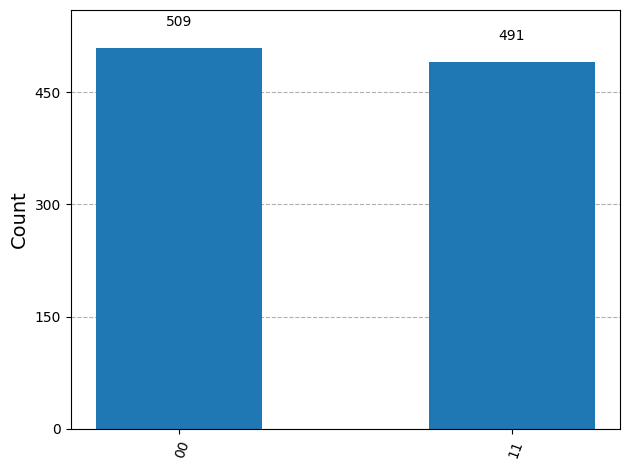

In [11]:
plot_histogram(counts)

## Let's see what is exactly a state vector and what is Unitary matrix or the gate of the circuit

In [ ]:
# Create a single qubit circuit
qc2 = QuantumCircuit(2, 2)
qc2.h(0)  # Hadamard to create superposition
qc2.cx(0,1)
Statevector(qc2) # Get the statevector of the circuit

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [13]:
# Get your statevector
state = Statevector(qc2)

# Display in LaTeX format (works well in Jupyter notebooks)
array_to_latex(state)

<IPython.core.display.Latex object>

In [ ]:
Statevector(qc2).draw('latex')  # Display the statevector in LaTeX format

<IPython.core.display.Latex object>

#### Checking the matrix of the gate of the systems

In [ ]:
Operator(qc2)  # Get the operator of the circuit

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [17]:
# Get your statevector
operator_matrix = Operator(qc2)

# Display in LaTeX format (works well in Jupyter notebooks)
array_to_latex(operator_matrix)

<IPython.core.display.Latex object>

## Run a simple circuit with different gates to see the effect of transpilation

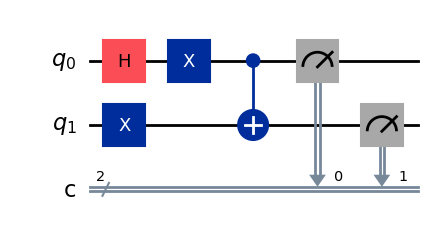

In [18]:
# Create a Quantum Register with 2 qubits and a Classical Register with 2 bits
qr3 = QuantumRegister(2, 'q')
cr3 = ClassicalRegister(2, 'c')
qc3 = QuantumCircuit(qr3, cr3)

# Apply a Hadamard gate to qubit 0
qc3.h(0)

qc3.x(0)
qc3.x(1)

# Apply a CNOT gate to qubit 1 controlled by qubit 0 (creates entanglement)
qc3.cx(0, 1)

# Measure the qubits
qc3.measure([0, 1], [0, 1])

# Transpile the circuit for the backend
qc3_tr = transpile(qc3, backend)

# Execute the circuit on the basic simulator backend with different shots
job3 = backend.run(qc3_tr, shots=2048)

# Get the result
result3 = job3.result()

# Draw the circuit
qc3.draw('mpl')

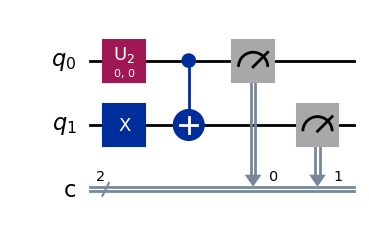

In [19]:
# Draw the  transpiled circuit
qc3_tr.draw('mpl')

## Running circuit with Qiskit Primitives

In [20]:
# 1. A quantum circuit for preparing the quantum state (|00> + |11>)/rt{2}
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# 2: Optimize problem for quantum execution.
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(bell)

In [21]:
# 3. Execute using the Sampler primitive
# initialization of the sampler
sampler = Sampler(backend)
sampler.options.default_shots = 1024
job = sampler.run([isa_circuit])

print(f"Job ID is {job.job_id()}")
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Job ID is cff05996-3a0e-43b0-9782-48ac57ade619
Counts for the meas output register: {'11': 493, '00': 531}


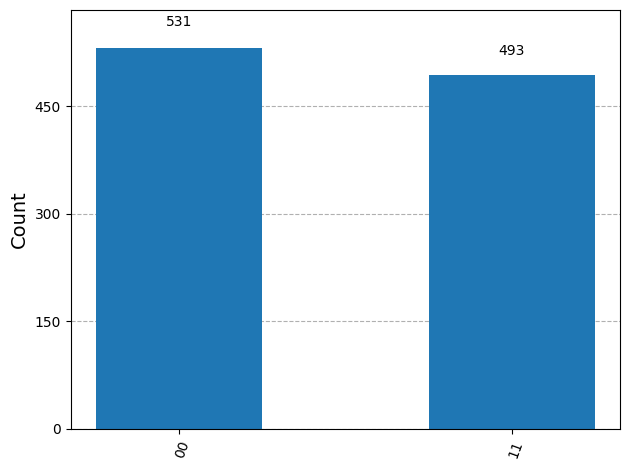

In [ ]:
plot_histogram(pub_result.data.meas.get_counts())

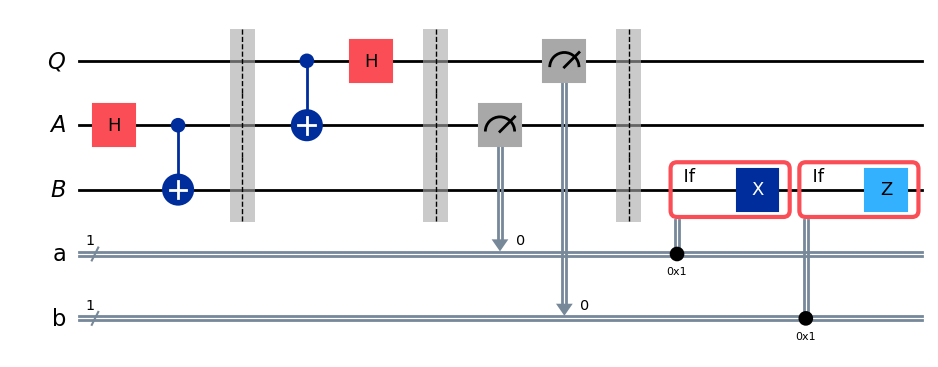

In [27]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw(output="mpl"))

In [28]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)

display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

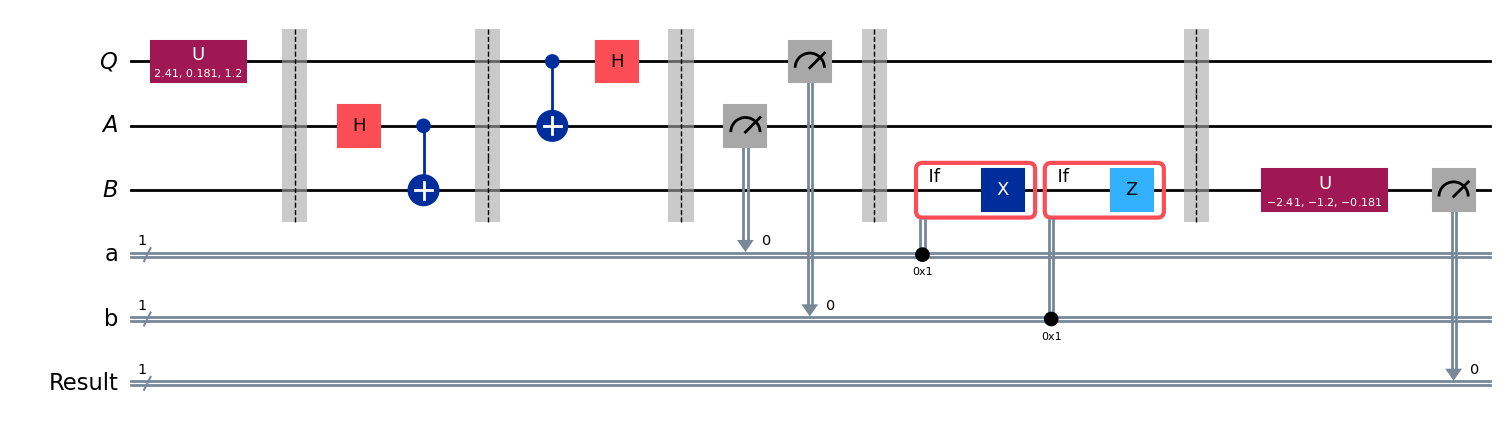

In [29]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw(output="mpl"))

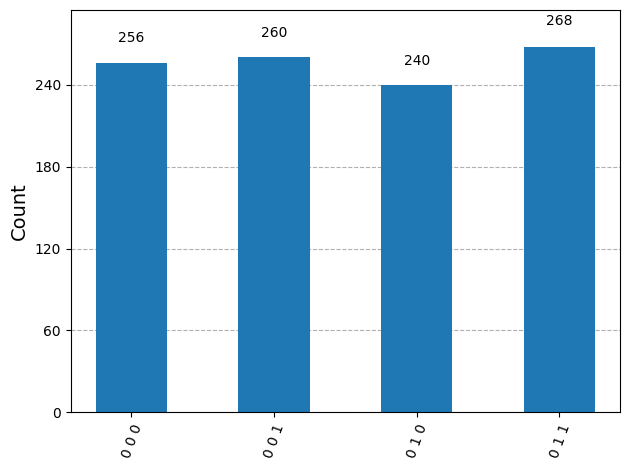

In [30]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

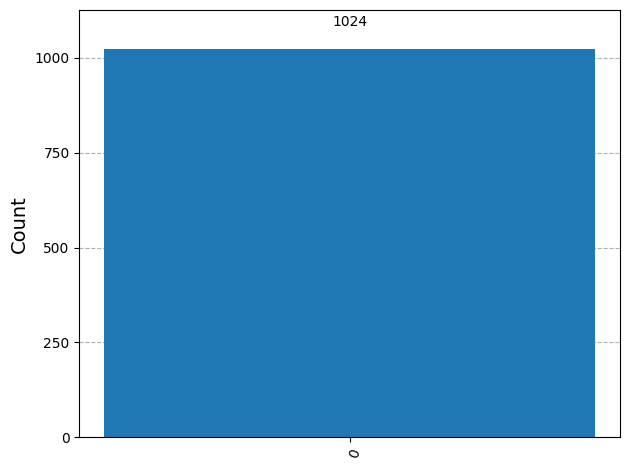

In [31]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))